# Gaussian Filter

This Jupyter notebook details the steps of binary logistic regression classifier.<br> 
The notebook was implemented by <i>Nada Chaari</i>, PhD student at Istanbul Technical University (ITU). <br>

# <font color='darkblue'> Table of Contents </font>
### <font color='darkblue'> Brief description  </font>
### <font color='darkblue'> Visualize Gaussian distribution </font>
### <font color='darkblue'> Implement Gaussian filter </font>
### <font color='darkblue'> Effect of the Gaussian filter size on the bluring phenomenon </font>
### <font color='darkblue'> Effect of the Gaussian filter size on the bluring phenomenon </font>
### <font color='darkblue'> Conclusion

### Brief Description

* The Gaussian smoothing operator is a 2-D convolution operator that is used to blur images and remove detail and noise. In this sense it is similar to the mean filter, but it uses a different kernel that represents the shape of a Gaussian ('bell-shaped') hump. This kernel has some special properties which are detailed below. 

reference: https://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm

* The Gaussian distribution in 1-D has the form: 

<img src='https://homepages.inf.ed.ac.uk/rbf/HIPR2/eqns/eqngaus1.gif' width='200'  align="center">

reference: https://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm

where  $\sigma$ is the standard deviation of the distribution. We have also assumed that the distribution has a mean of zero (i.e. it is centered on the line x=0).

<img src='https://homepages.inf.ed.ac.uk/rbf/HIPR2/figs/gauss1.gif' width='200'  align="center">

reference: https://homepages.inf.ed.ac.uk/rbf/HIPR2/figs/gauss1.gif

* In 2-D, an isotropic (i.e. circularly symmetric) Gaussian with mean (0,0) and  $\sigma$ =1 has the form:

<img src='https://homepages.inf.ed.ac.uk/rbf/HIPR2/eqns/eqngaus2.gif' width='200'  align="center">

reference: https://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm

<img src='https://homepages.inf.ed.ac.uk/rbf/HIPR2/figs/gauss2.gif' width='300'  align="center">

reference: https://homepages.inf.ed.ac.uk/rbf/HIPR2/figs/gauss1.gif

In [1]:
import cv2 # use  the OpenCV library for filter implementation
import matplotlib.pyplot as plt
import numpy as np

###  Visualize Gaussian distribution

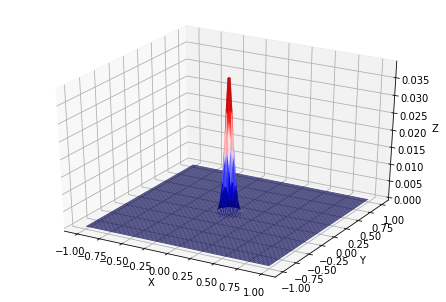

In [2]:
# Generate a two-dimensional grid plane 
from mpl_toolkits.mplot3d import Axes3D
X, Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))

gauss = cv2.getGaussianKernel(100,2) # 1-d gaussian distribution with standard deviation equal to 2
gauss_2d = gauss * gauss.transpose(1, 0) # 2-d gaussian distribution with standard deviation equal to 2

'''Binary Gaussian probability distribution map'''
fig = plt.figure(figsize=(6,4))
ax = Axes3D(fig)
ax.plot_surface(X, Y, gauss_2d, rstride=1, cstride=1, cmap='seismic', alpha=0.8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

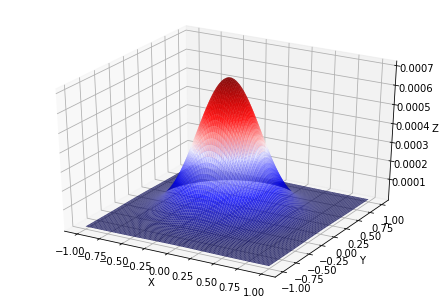

In [3]:
# Generate a two-dimensional grid plane
from mpl_toolkits.mplot3d import Axes3D
X, Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))

gauss = cv2.getGaussianKernel(100,15)# 1-d gaussian distribution with standard deviation equal to 15
gauss_2d = gauss * gauss.transpose(1, 0) # 2-d gaussian distribution with standard deviation equal to 15

'''Binary Gaussian probability distribution map'''
fig = plt.figure(figsize=(6,4))
ax = Axes3D(fig)
ax.plot_surface(X, Y, gauss_2d, rstride=1, cstride=1, cmap='seismic', alpha=0.8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

### Implement Gaussian filter

In [4]:
original_image = cv2.imread("bee.png") # import and read the image 

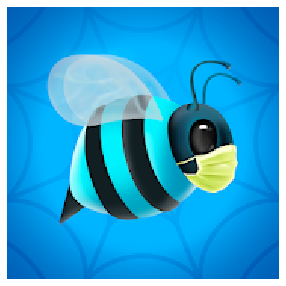

In [5]:
plt.figure(figsize=(5,5)) # resize the image
plt.imshow(original_image , cmap="gray")
plt.axis('off')
plt.show('off')

In [6]:
original_image.shape

(180, 180, 3)

In [7]:
original_image[85:95,85:95,1]

array([[ 31,  31,  31,  31,  21,  63, 224, 250, 247, 246],
       [ 31,  31,  31,  31,  25,  30, 216, 250, 247, 246],
       [ 31,  31,  31,  31,  31,   0, 205, 251, 247, 246],
       [ 31,  31,  31,  31,  31,   0, 191, 250, 247, 246],
       [ 31,  31,  31,  31,  31,   0, 166, 250, 247, 246],
       [ 31,  31,  31,  31,  31,   0, 118, 250, 247, 246],
       [ 31,  31,  31,  31,  31,  22,  19, 249, 247, 247],
       [ 31,  31,  31,  31,  31,  32,   0, 238, 248, 247],
       [ 31,  31,  31,  31,  31,  32,   0, 206, 252, 247],
       [ 31,  31,  31,  31,  31,  31,   0, 154, 255, 247]], dtype=uint8)

In [8]:
gauss_kernel_1d = cv2.getGaussianKernel(3, 3)
print('1-d gaussian filter :', )
print(gauss_kernel_1d)
gauss_kernel_2d = gauss_kernel_1d * gauss_kernel_1d.transpose(1, 0)
print('2-d gaussian filter :',) 
gauss_kernel_2d

1-d gaussian filter :
[[0.32710442]
 [0.34579116]
 [0.32710442]]
2-d gaussian filter :


array([[0.1069973 , 0.11310982, 0.1069973 ],
       [0.11310982, 0.11957153, 0.11310982],
       [0.1069973 , 0.11310982, 0.1069973 ]])

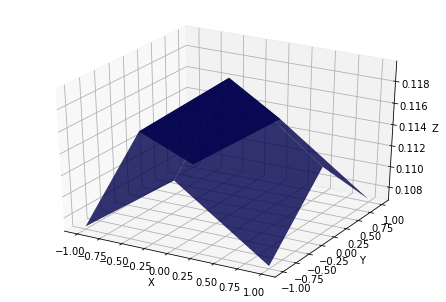

In [9]:
# Generate a two-dimensional grid plane
from mpl_toolkits.mplot3d import Axes3D
X, Y = np.meshgrid(np.linspace(-1,1,3), np.linspace(-1,1,3))

'''Binary Gaussian probability distribution map'''
fig = plt.figure(figsize=(6,4))
ax = Axes3D(fig)
ax.plot_surface(X, Y, gauss_kernel_2d, rstride=1, cstride=1, cmap='seismic', alpha=0.8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

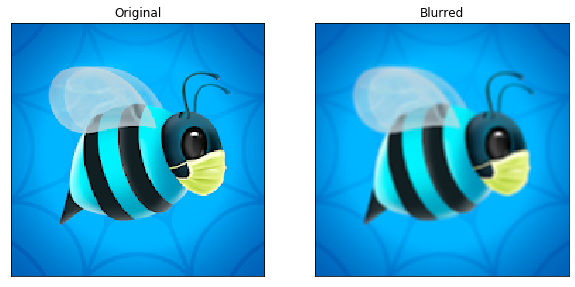

In [10]:
blur1 = cv2.GaussianBlur(original_image, (3,3), 3, cv2.BORDER_DEFAULT)# 
# (5,5): Gaussian Kernel Size [height width]. height and width should be odd 
# 3: Kernel standard deviation long X-axis and long Y-axis 
# cv2.BORDER_DEFAULT: Specifies image boundaries (pixel extrapolation) while kernel is applied on image borders: this type reflects the border of the image
# ‘reflect’ (d c b a | a b c d | d c b a)
f = plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(original_image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur1),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

In [11]:
original_image[85:95,85:95,1]

array([[ 31,  31,  31,  31,  21,  63, 224, 250, 247, 246],
       [ 31,  31,  31,  31,  25,  30, 216, 250, 247, 246],
       [ 31,  31,  31,  31,  31,   0, 205, 251, 247, 246],
       [ 31,  31,  31,  31,  31,   0, 191, 250, 247, 246],
       [ 31,  31,  31,  31,  31,   0, 166, 250, 247, 246],
       [ 31,  31,  31,  31,  31,   0, 118, 250, 247, 246],
       [ 31,  31,  31,  31,  31,  22,  19, 249, 247, 247],
       [ 31,  31,  31,  31,  31,  32,   0, 238, 248, 247],
       [ 31,  31,  31,  31,  31,  32,   0, 206, 252, 247],
       [ 31,  31,  31,  31,  31,  31,   0, 154, 255, 247]], dtype=uint8)

In [12]:
blur1[85:95,85:95,1] # Sharpness between two borders decreased which become smoother

array([[ 31,  31,  31,  27,  37, 101, 179, 240, 247, 246],
       [ 31,  31,  31,  29,  29,  90, 166, 238, 248, 246],
       [ 31,  31,  31,  30,  23,  80, 156, 234, 248, 246],
       [ 31,  31,  31,  31,  21,  72, 147, 229, 248, 246],
       [ 31,  31,  31,  31,  21,  62, 136, 219, 248, 246],
       [ 31,  31,  31,  31,  23,  46, 119, 200, 248, 246],
       [ 31,  31,  31,  31,  27,  31, 102, 180, 247, 246],
       [ 31,  31,  31,  31,  30,  22,  87, 163, 242, 247],
       [ 31,  31,  31,  31,  31,  21,  76, 151, 233, 248],
       [ 31,  31,  31,  31,  31,  22,  61, 136, 218, 248]], dtype=uint8)

### Effect of the Gaussian filter size on the bluring phenomenon

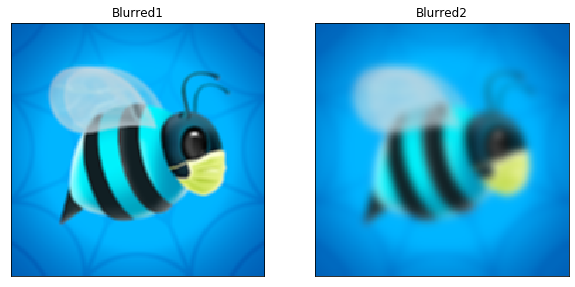

In [13]:
blur2 = cv2.GaussianBlur(original_image, (25,25),3, cv2.BORDER_DEFAULT)
f = plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(blur1),plt.title('Blurred1')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur2),plt.title('Blurred2')
plt.xticks([]), plt.yticks([])
plt.show()

In [14]:
gauss_kernel_1d = cv2.getGaussianKernel(3, 1)
print('1-d gaussian filter :', )
print(gauss_kernel_1d)
gauss_kernel_2d = gauss_kernel_1d * gauss_kernel_1d.transpose(1, 0)
print('2-d gaussian filter :',) 
gauss_kernel_2d

1-d gaussian filter :
[[0.27406862]
 [0.45186276]
 [0.27406862]]
2-d gaussian filter :


array([[0.07511361, 0.1238414 , 0.07511361],
       [0.1238414 , 0.20417996, 0.1238414 ],
       [0.07511361, 0.1238414 , 0.07511361]])

### Effect of the Gaussian filter standard deviation on the bluring phenomenon

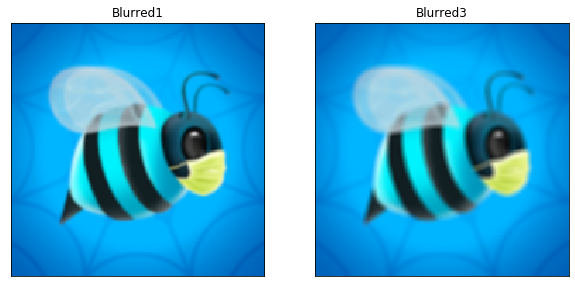

In [15]:
blur3 = cv2.GaussianBlur(original_image, (5,5),1, cv2.BORDER_DEFAULT)
blur4 = cv2.GaussianBlur(original_image, (5,5),3, cv2.BORDER_DEFAULT)
f = plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(blur3),plt.title('Blurred1')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur4),plt.title('Blurred3')
plt.xticks([]), plt.yticks([])
plt.show()

###  Conclusion

* The Gaussian filter serves for image smoothing.

* In terms of image processing, any sharp edges in images are smoothed while minimizing too much blurring.

* The kernel size changes the feature localization property. If it is large, then the features will more likely to be global instead of local. 

* Larger kernels are less computationally efficient due to increased amount of individual calculations.

* To smooth the image, the gaussian filter gives higher importance to the neighborhood pixels and less on the distant pixels (weighted average).